In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
data_set = pd.read_csv('C:/Users/yueeeeeee87/Desktop/申請資料/相關課堂作業/機器學習/CreditCard(Card)/CreditCard(Card)-1.CSV')
                       
data_set['card'] = data_set['card'].replace({'yes':'0', 'no':'1'})
data_set['owner'] = data_set['owner'].replace({'yes':'0', 'no':'1'})
data_set['selfemp'] = data_set['selfemp'].replace({'yes':'0', 'no':'1'})
print(data_set.isna())


       card  reports    age  income  share  expenditure  owner  selfemp  \
0     False    False  False   False  False        False  False    False   
1     False    False  False   False  False        False  False    False   
2     False    False  False   False  False        False  False    False   
3     False    False  False   False  False        False  False    False   
4     False    False  False   False  False        False  False    False   
...     ...      ...    ...     ...    ...          ...    ...      ...   
1314  False    False  False   False  False        False  False    False   
1315  False    False  False   False  False        False  False    False   
1316  False    False  False   False  False        False  False    False   
1317  False    False  False   False  False        False  False    False   
1318  False    False  False   False  False        False  False    False   

      dependents  months  majorcards  active  
0          False   False       False   False  
1    

In [3]:
x = data_set.drop('card', axis = 1)
y = data_set['card']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
sampler = RandomOverSampler(random_state=8)
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [6]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

DecisionTree Model Accuracy: 0.9797979797979798


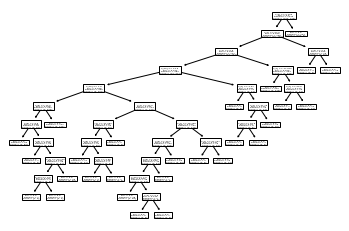

In [16]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini',
                                max_depth=None, max_features=None, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, random_state=None, splitter='best')
classifier = classifier.fit(x_train, y_train)
predict = classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print('DecisionTree Model Accuracy:', accuracy)

tree.plot_tree(classifier)
plt.show()

Fitting 3 folds for each of 42 candidates, totalling 126 fits
DecisionTree Model Accuracy after GridSearchCV: 0.9873737373737373


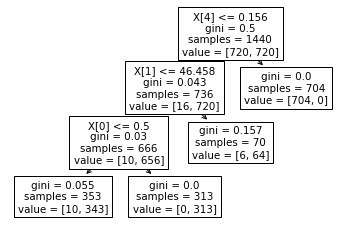

In [17]:
#調參
grid_params_cart = {
    'max_depth':[3,5,7,9,11,13,15],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[0.04,0.06,0.08]
}
gs = GridSearchCV(classifier, grid_params_cart, verbose=1, cv=3, n_jobs=-1)
gs_results = gs.fit(x_train, y_train)

best_estimator = gs_results.best_estimator_
best_estimator
classifier = best_estimator
classifier = classifier.fit(x_train, y_train)
predict = classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print('DecisionTree Model Accuracy after GridSearchCV:', accuracy)
tree.plot_tree(classifier)
plt.show()